# Data Quality and checks
Here, let's load the dataset we saved last time and look at the data more carefully, to see if we can get some insights or ideas as to how to make new features, how to clean the data and so on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('combined_airbnb.csv')

In [3]:
pd.options.display.max_columns = None
df.head()

,Unnamed: 0,listing_id,index,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,host_about,total_reviews,days_since_review,comment_length
0,0,50904.0,166028.333333,166029.333333,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2.0,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,1358.500000,255.500000
1,1,891884.0,30098.000000,30099.000000,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2.0,1 private bath,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,619.000000,127.000000
2,2,891907.0,202080.333333,202081.333333,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4.0,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,6.0,1694.500000,300.166667
3,3,2543695.0,114259.666667,114260.666667,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4.0,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,15.0,1603.866667,362.866667
4,4,116134.0,173486.666667,173487.666667,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4.0,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,120.0,1540.908333,265.266667


In [4]:
df.shape

(1749, 29)

In [5]:
df.columns

Index(['Unnamed: 0', 'listing_id', 'index', 'calender_id', 'available',
       'price', 'adjusted_price', 'minimum_nights', 'maximum_nights',
       'listing_url', 'name', 'description', 'latitude', 'longitude',
       'property_type', 'room_type', 'accomodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'total_reviews', 'days_since_review',
       'comment_length'],
      dtype='object')

There are some columns, which were helpful to join the tables, but we don't need those columns now, so we can drop them now. For eg. 'Calendar_id'

In [6]:
df.drop(['Unnamed: 0', 'index','calender_id'], axis=1, inplace=True)

### Looking at missing values for every column

<AxesSubplot:>

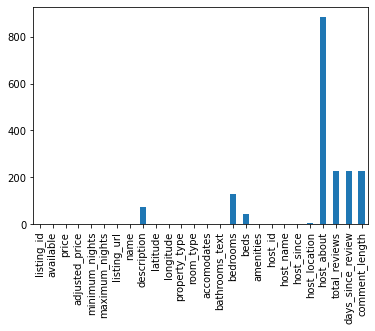

In [7]:
df.isna().sum().plot(kind='bar')

We can see that we have a lot of missing values in the host_about column, almost 50% missing values in that column. It is better we drop this column

In [8]:
df.drop(['host_about'], axis=1, inplace=True)

### Looking at missing values for every row

<AxesSubplot:>

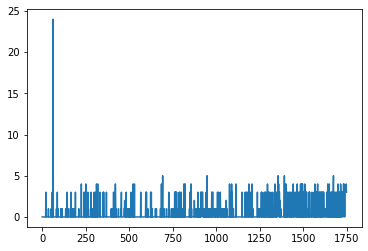

In [9]:
df.isna().sum(axis=1).plot()

Here we see that we have certain rows, which are mostly empty, so it is better to remove the rows, which have more than 4 missing values.

In [10]:
df.shape

(1749, 25)

In [11]:
# Dropping rows which have more that 4 missing values
df = df[df.isna().sum(axis=1) < 4]
df.reset_index(level=0, inplace=True)
df.drop(['index'], axis=1, inplace=True)

In [12]:
df.shape

(1702, 25)

So we will be losing about 47 rows, which is about 2% of our data. 

<AxesSubplot:>

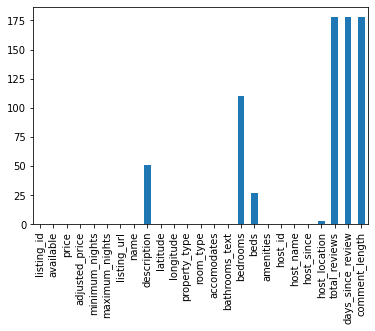

In [13]:
df.isna().sum().plot(kind='bar')

We can still see that we have columns, that are still having missing values of 175 rows, which is 10% of the data. it could be better we remove these columns

## Here we have dilema
- We have about 175 rows for which we do not have any reviews, and this makes sense, there are some listings which might not even have a single review, 
- So, if we try to remove the whole columns, we are losing out on the remaining 90% of the data we have for the remaining listings and their reviews and we don't want to do that.
- On the other hand, we we try to remove these rows specifically, then our model will never learn how to predict for the entries which do not have a review yet.
- This is a problem that you might see in a real world dataset at well, how do you train a model when the data for which is simply not adequate. 

## Or 
- one of the thing we can do is to replace these values with 0, as it would indicate that they do not have a total_review as it is zero.
- for the days_since_review we can't simply replace it with zero, think about it.
- The lower the days_since_review means that the review was recent, we want this behavious as a popular place is more likely to have a recent review than a place with very few visitors.
- Meaning if i were to replace days_since_review with 0, i would be indicating to the model this place was very recently reviewed, whereas the truth is that the place was never reviews(exact opposite of our intentions)

---------------

Replacing the rows with empty total reviews

In [14]:
df['total_reviews'] = df['total_reviews'].fillna(0)

<AxesSubplot:>

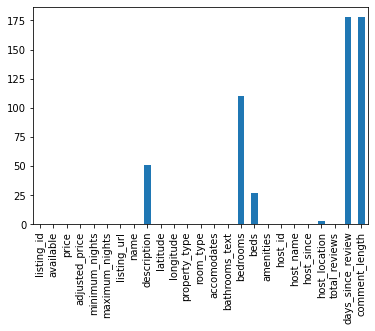

In [15]:
df.isna().sum().plot(kind='bar')

Replacing days_since_review with the highest value

In [16]:
df['days_since_review'] = df['days_since_review'].fillna(df['days_since_review'].max())

<AxesSubplot:>

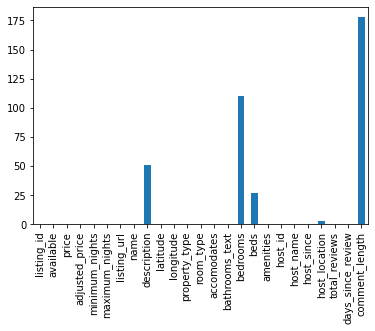

In [17]:
df.isna().sum().plot(kind='bar')

For comment_length we will make it to be 0, as there was no comment for the listing

In [18]:
df['comment_length'] = df['comment_length'].fillna(0)

<AxesSubplot:>

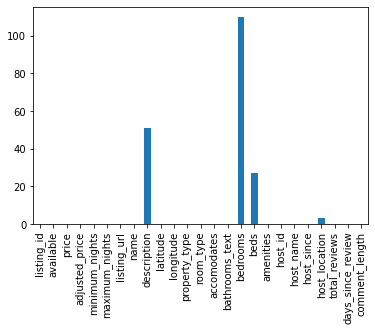

In [19]:
df.isna().sum().plot(kind='bar')

### One can argue that the bedrooms is an important variable, and values missing should be filled or the rows removed.
- ideally i would have liked to removed the rows but as i can see
- the number of missing values are above 100, if i start removing those rows, i am further reducing my data size
- i would rather not do at this point. So i would like to fill these missing values with the mean

**Description** is a column, i will not use for my modelling here, but feel free to use NLP for that column if you want.

In [20]:
df.drop(['description'], axis=1, inplace=True)

In [21]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,Room in boutique hotel,Hotel room,2.0,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,Room in boutique hotel,Hotel room,2.0,1 private bath,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,Entire rental unit,Entire home/apt,4.0,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,Entire rental unit,Entire home/apt,4.0,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,Entire rental unit,Entire home/apt,4.0,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667


## Filling bedroom variable
- Rather than filling with mean, i am looking and experimenting if there are better ways out there to fill the bedroom variable with
- I am going to try to groupby various categorical variable and see if i can find a variable that gives me good 'variance' for the bedroom variable

<AxesSubplot:xlabel='property_type'>

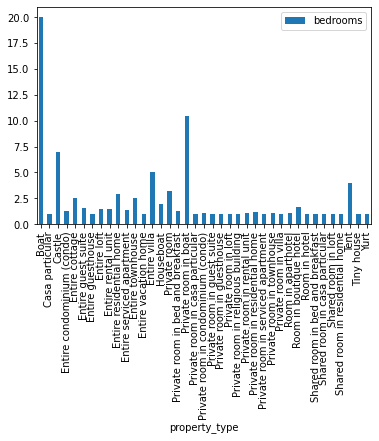

In [22]:
df.groupby('property_type').mean()[['bedrooms']].plot(kind='bar')

<AxesSubplot:xlabel='accomodates'>

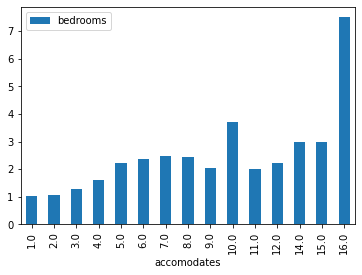

In [23]:
df.groupby('accomodates').mean()[['bedrooms']].plot(kind='bar')

<AxesSubplot:xlabel='room_type'>

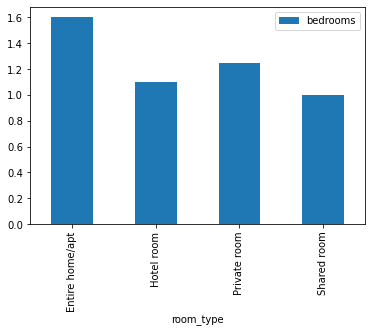

In [24]:
df.groupby('room_type').mean()[['bedrooms']].plot(kind='bar')

## Findings
- From the plots above i can figure out that 'accomodates' and 'number_of_amneties' are good indicators to tell how many bedrooms are there going to be. 
- So due to these reasons, i am going to fill out bedroom variable based on the 'accomodates' variable

In [25]:
bedroom_dict = df.groupby('accomodates').mean()['bedrooms'].to_dict()

In [26]:
bedroom_dict_round = {key : round(bedroom_dict[key], 0) for key in bedroom_dict}

In [27]:
bedroom_dict_round

{1.0: 1.0,
 2.0: 1.0,
 3.0: 1.0,
 4.0: 2.0,
 5.0: 2.0,
 6.0: 2.0,
 7.0: 2.0,
 8.0: 2.0,
 9.0: 2.0,
 10.0: 4.0,
 11.0: 2.0,
 12.0: 2.0,
 14.0: 3.0,
 15.0: 3.0,
 16.0: 8.0}

<AxesSubplot:>

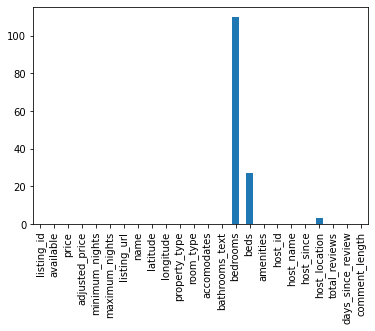

In [28]:
df.isna().sum().plot(kind='bar')

Index of all the missing values

In [29]:
missing_index = df[pd.isna(df.bedrooms)].index

Our prediction for the missing values

In [30]:
missing_values_predicted = df[df['bedrooms'].isna()]['accomodates'].map(bedroom_dict_round)

In [31]:
missing_values_predicted

81      2.0
89      1.0
90      1.0
107     1.0
114     1.0
       ... 
1473    1.0
1494    2.0
1586    1.0
1659    2.0
1660    1.0
Name: accomodates, Length: 110, dtype: float64

Filling in those missing values 

In [32]:
for i,j in enumerate(missing_index):
    df.iloc[j,14] = missing_values_predicted.iloc[i]

<AxesSubplot:>

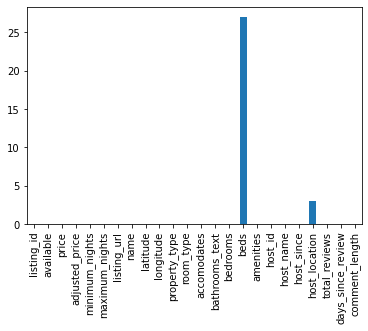

In [33]:
df.isna().sum().plot(kind='bar')

### Last but not least, the bed column is the only column remaining, that we need to clean.
I am going to follow the same approach that i used to fill the bedroom column

In [34]:
beds_dict = df.groupby('bedrooms').mean()['beds'].to_dict()

In [35]:
beds_dict_round = {key : round(beds_dict[key], 0) for key in beds_dict}

In [36]:
beds_dict_round

{1.0: 1.0,
 2.0: 3.0,
 3.0: 4.0,
 4.0: 6.0,
 5.0: 8.0,
 6.0: 12.0,
 7.0: 16.0,
 8.0: 25.0,
 10.0: 15.0,
 11.0: 16.0,
 15.0: 15.0,
 20.0: 44.0}

<AxesSubplot:>

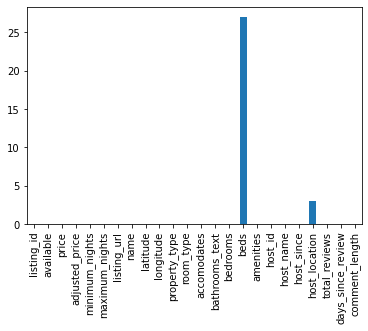

In [37]:
df.isna().sum().plot(kind='bar')

Index of all the missing values

In [38]:
missing_index = df[pd.isna(df.beds)].index

Our prediction for the missing values

In [39]:
missing_values_predicted = df[df['beds'].isna()]['bedrooms'].map(bedroom_dict_round)

In [40]:
missing_values_predicted

181     1.0
308     1.0
415     1.0
467     1.0
670     1.0
778     1.0
1040    1.0
1060    1.0
1184    1.0
1226    2.0
1279    1.0
1377    1.0
1378    1.0
1431    1.0
1433    1.0
1442    1.0
1444    1.0
1455    1.0
1471    1.0
1485    1.0
1514    1.0
1532    1.0
1568    1.0
1569    1.0
1584    1.0
1609    1.0
1677    1.0
Name: bedrooms, dtype: float64

Filling in those missing values 

In [41]:
for i,j in enumerate(missing_index):
    df.iloc[j,15] = missing_values_predicted.iloc[i]

<AxesSubplot:>

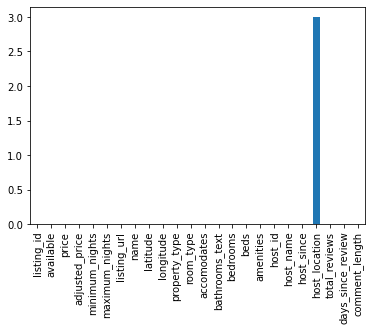

In [42]:
df.isna().sum().plot(kind='bar')

### For the last column with missing values 'host_location'
- There are a couple of options we have here 
- As there are only 3 missing values, we can just remove the rows, simple as that.
- Or you can try to impute them with some method

I am going to just remove the rows, feel free to experiment if you want

In [43]:
non_na_rows = df['host_location'].notna()

In [44]:
df = df[non_na_rows]
df.reset_index(level=0, inplace=True)
df.drop(['index'], axis=1, inplace=True)

<AxesSubplot:>

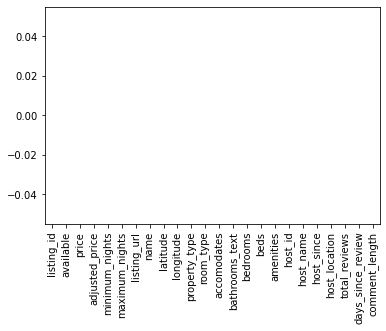

In [45]:
df.isna().sum().plot(kind='bar')

## Finally, after all the various data imputation and cleaning, we have a clean dataset.
- That we can create models on
- That we can create more features on

----------

### Now that our data is clean, let's look at the data properties

In [46]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,Room in boutique hotel,Hotel room,2.0,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,Room in boutique hotel,Hotel room,2.0,1 private bath,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,Entire rental unit,Entire home/apt,4.0,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,Entire rental unit,Entire home/apt,4.0,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,Entire rental unit,Entire home/apt,4.0,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_id         1699 non-null   float64
 1   available          1699 non-null   float64
 2   price              1699 non-null   float64
 3   adjusted_price     1699 non-null   float64
 4   minimum_nights     1699 non-null   float64
 5   maximum_nights     1699 non-null   float64
 6   listing_url        1699 non-null   object 
 7   name               1699 non-null   object 
 8   latitude           1699 non-null   float64
 9   longitude          1699 non-null   float64
 10  property_type      1699 non-null   object 
 11  room_type          1699 non-null   object 
 12  accomodates        1699 non-null   float64
 13  bathrooms_text     1699 non-null   object 
 14  bedrooms           1699 non-null   float64
 15  beds               1699 non-null   float64
 16  amenities          1699 

#### Numeric columns

In [48]:
df.describe()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,accomodates,bedrooms,beds,host_id,total_reviews,days_since_review,comment_length
count,1.699000e+03,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1.699000e+03,1699.000000,1699.000000,1699.000000
mean,3.454408e+07,0.504022,116.050226,115.621150,4.984304,815.681577,51.214123,4.413115,3.770453,1.505003,2.203649,1.411752e+08,36.759859,926.861346,180.218010
std,1.526862e+07,0.499345,188.711087,187.904327,19.267865,519.442367,0.013800,0.019340,2.770626,1.054104,2.220678,1.285789e+08,62.071381,781.448221,116.353612
min,5.090400e+04,0.000000,14.000000,14.000000,1.000000,1.000000,51.160084,4.290770,1.000000,1.000000,1.000000,2.340770e+05,0.000000,110.000000,0.000000
25%,2.299728e+07,0.000000,60.000000,60.000000,1.000000,365.000000,51.208120,4.400260,2.000000,1.000000,1.000000,2.819556e+07,3.000000,283.896552,125.968750
50%,3.828111e+07,1.000000,80.000000,80.000000,2.000000,1125.000000,51.216650,4.409340,3.000000,1.000000,2.000000,1.027113e+08,13.000000,718.333333,180.689655
75%,4.813282e+07,1.000000,112.333333,112.333333,2.666667,1125.000000,51.220910,4.424790,4.000000,2.000000,3.000000,2.338721e+08,41.000000,1246.172944,230.316667
max,5.398332e+07,1.000000,5800.000000,5800.000000,500.000000,9999.000000,51.349400,4.483470,16.000000,20.000000,44.000000,4.373093e+08,648.000000,2720.132353,1436.000000


In [49]:
df.describe([.1,.4,.5,.6,.9,.99])

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,accomodates,bedrooms,beds,host_id,total_reviews,days_since_review,comment_length
count,1.699000e+03,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1.699000e+03,1699.000000,1699.000000,1699.000000
mean,3.454408e+07,0.504022,116.050226,115.621150,4.984304,815.681577,51.214123,4.413115,3.770453,1.505003,2.203649,1.411752e+08,36.759859,926.861346,180.218010
std,1.526862e+07,0.499345,188.711087,187.904327,19.267865,519.442367,0.013800,0.019340,2.770626,1.054104,2.220678,1.285789e+08,62.071381,781.448221,116.353612
min,5.090400e+04,0.000000,14.000000,14.000000,1.000000,1.000000,51.160084,4.290770,1.000000,1.000000,1.000000,2.340770e+05,0.000000,110.000000,0.000000
10%,1.027352e+07,0.000000,45.000000,45.000000,1.000000,13.000000,51.198756,4.394420,2.000000,1.000000,1.000000,9.438572e+06,0.000000,179.647619,0.000000
40%,3.319326e+07,0.000000,73.000000,72.733333,1.666667,1125.000000,51.213332,4.405212,2.000000,1.000000,1.000000,5.262567e+07,8.000000,516.198519,160.665934
50%,3.828111e+07,1.000000,80.000000,80.000000,2.000000,1125.000000,51.216650,4.409340,3.000000,1.000000,2.000000,1.027113e+08,13.000000,718.333333,180.689655
60%,4.165281e+07,1.000000,90.000000,90.000000,2.000000,1125.000000,51.218488,4.416318,4.000000,1.000000,2.000000,1.647852e+08,21.000000,906.497030,198.406573
90%,5.201646e+07,1.000000,191.000000,190.000000,7.000000,1125.000000,51.225720,4.438714,7.000000,2.000000,4.000000,3.497191e+08,101.000000,2720.132353,289.963376
99%,5.376968e+07,1.000000,950.800000,950.400000,40.200000,1125.000000,51.250239,4.463852,14.020000,5.000000,9.020000,4.286115e+08,299.080000,2720.132353,481.986667


<AxesSubplot:xlabel='comment_length', ylabel='Density'>

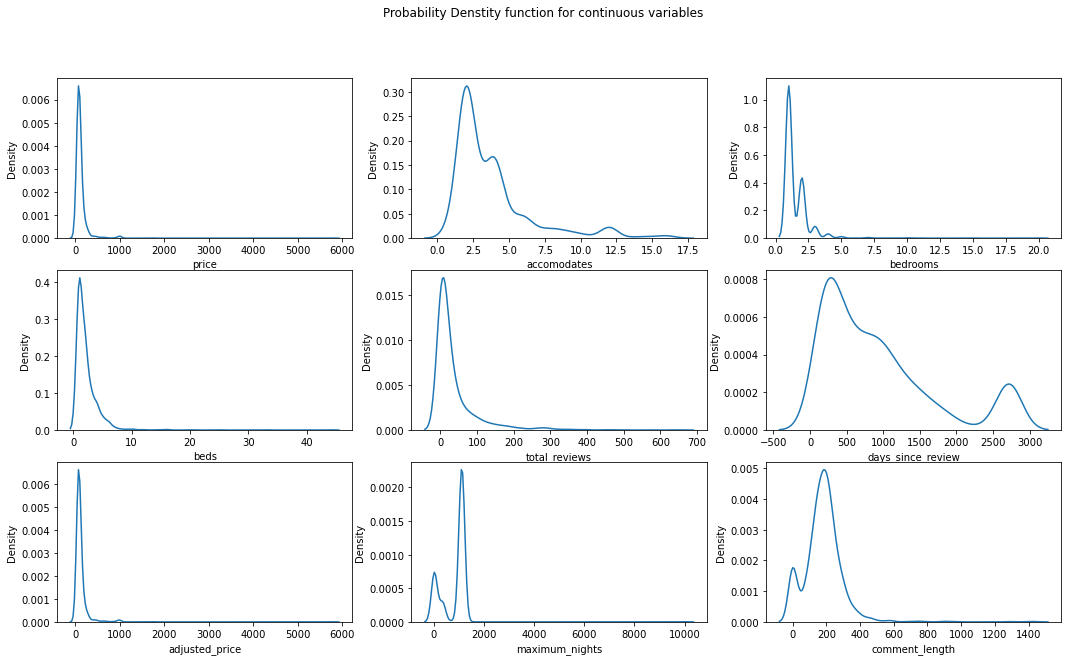

In [50]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
 
fig.suptitle('Probability Denstity function for continuous variables')
 

sns.kdeplot(df['price'],ax=axes[0, 0])
sns.kdeplot(df['accomodates'],ax=axes[0, 1])
sns.kdeplot(df['bedrooms'],ax=axes[0, 2])

sns.kdeplot(df['beds'],ax=axes[1, 0])
sns.kdeplot(df['total_reviews'],ax=axes[1, 1])
sns.kdeplot(df['days_since_review'],ax=axes[1, 2])


sns.kdeplot(df['adjusted_price'],ax=axes[2, 0])
sns.kdeplot(df['maximum_nights'],ax=axes[2, 1])
sns.kdeplot(df['comment_length'],ax=axes[2, 2])

## Observations
- The average price for a room is 115. Most of it in the middle, high kurtosis - low skewness
- An average room accomodates almost 3-4 people. We have good spread here. Not as dense as price
- On Average, there are 1-2 bedrooms available on a property. With few having 2-3 and rarely we see 4-5.
- There are about 1-2 beds on average for our listings.
- There are about 36 reviews per listing_id, which is good.
- We have 926 'days_since_review', which is poor. You see a gradual decrease but a bump for 2700 mark, this must be due to the way we filled in missing values, we have to be careful about this, if this messes up with the model, we might have to change the approach to fill in these missing values.
- For comment length, i don't know how useful that will be, will know after we train the model

In [51]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,Room in boutique hotel,Hotel room,2.0,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,Room in boutique hotel,Hotel room,2.0,1 private bath,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,Entire rental unit,Entire home/apt,4.0,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,Entire rental unit,Entire home/apt,4.0,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,Entire rental unit,Entire home/apt,4.0,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667


<AxesSubplot:xlabel='property_type'>

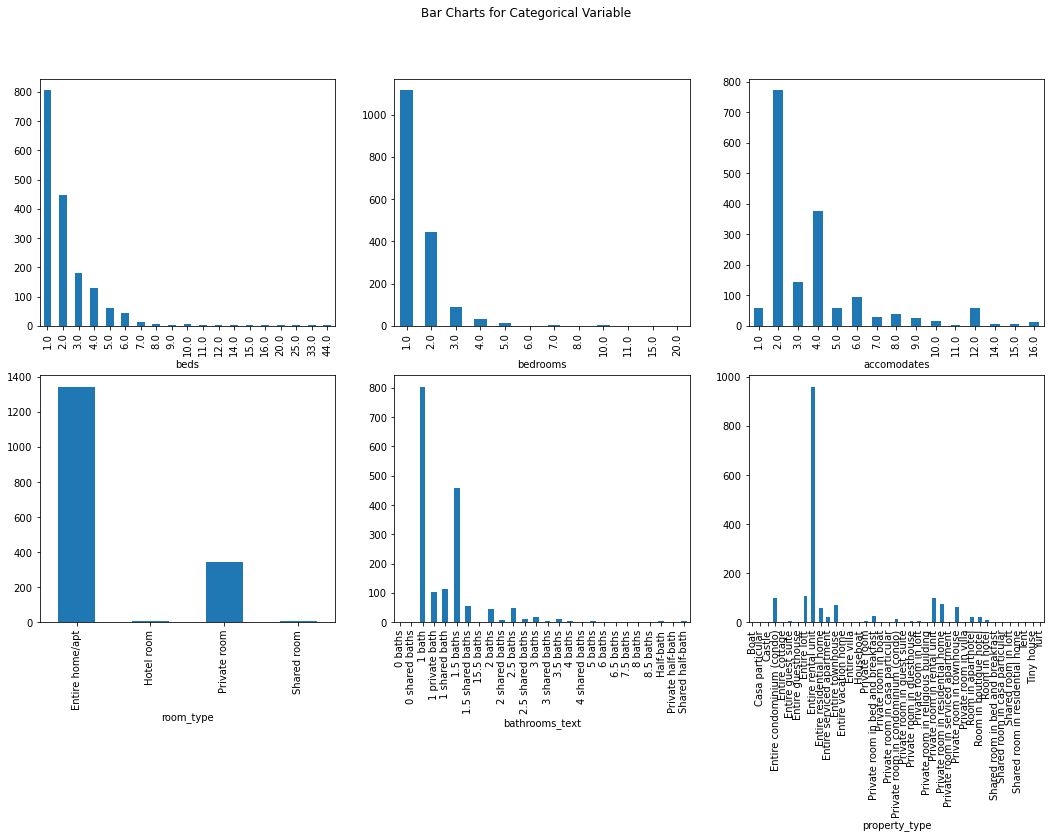

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Bar Charts for Categorical Variable')

df.groupby('beds').count()['listing_id'].plot(kind='bar',ax=axes[0, 0])
df.groupby('bedrooms').count()['listing_id'].plot(kind='bar',ax=axes[0, 1])
df.groupby('accomodates').count()['listing_id'].plot(kind='bar',ax=axes[0, 2])

df.groupby('room_type').count()['listing_id'].plot(kind='bar',ax=axes[1, 0])
df.groupby('bathrooms_text').count()['listing_id'].plot(kind='bar',ax=axes[1, 1])
df.groupby('property_type').count()['listing_id'].plot(kind='bar',ax=axes[1, 2])

## Observations
- We have a pareto distribution for the number of beds available. 
- The number of bedrooms also follow the beds distribution (pareto)
- For accomodate, most of the values are centered around 2, with less values at 4 and a spike at 12. Will need to look into this.
- Room types are dominated by the entire home rather than a hotel room or private room. This is to be expected as this is AirBnb.
- Bathroom_text is very sparsely distributed and something needs to be done to make this column better usable.
- Same goes for property_type, Too sparsely distributed and somehow needs to resized.

Saving the clean dataframe to a csv

In [54]:
df.to_csv('cleaned_combined_airbnb.csv')